# Lab 00: Palmer Penguins

---
author: Yiran Hu
date: January 25, 2024
embed-resources: true
---

## Introduction

## Methods

In [59]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from joblib import dump

import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [36]:
penguins_train = pd.read_csv("https://cs307.org/lab-00/data/penguins-train.csv")
penguins_test = pd.read_csv("https://cs307.org/lab-00/data/penguins-test.csv")

In [37]:
penguins_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,40.5,17.9,187.0,3200.0,female,2007
1,Chinstrap,Dream,49.2,18.2,195.0,4400.0,male,2007
2,Chinstrap,Dream,52.8,20.0,205.0,4550.0,male,2008
3,Adelie,Biscoe,37.6,17.0,185.0,3600.0,female,2008
4,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,male,2007
...,...,...,...,...,...,...,...,...
228,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,male,2008
229,Adelie,Torgersen,37.2,19.4,184.0,3900.0,male,2008
230,Adelie,Biscoe,39.7,17.7,193.0,3200.0,female,2009
231,Chinstrap,Dream,45.2,17.8,198.0,3950.0,female,2007


### Summary Statistics

In [38]:
# Response: Counts and Proportions
train_count=penguins_train.groupby("species").agg('count').reset_index()
train_sum=train_count['year'][0]+train_count['year'][1]+train_count['year'][2]
train_count['proportion']=train_count['year']/train_sum
train_count['count']=train_count['year']
train_count=train_count[['species','count','proportion']]
train_count

,species,count,proportion
0,Adelie,98,0.420601
1,Chinstrap,45,0.193133
2,Gentoo,90,0.386266


In [46]:
# Feature: Bill Depth & Bill Length
bill_mean=penguins_train[['species','bill_depth_mm','bill_length_mm']].groupby('species').agg('mean').reset_index()
bill_mean

,species,bill_depth_mm,bill_length_mm
0,Adelie,18.276531,38.929592
1,Chinstrap,18.388889,48.793333
2,Gentoo,14.990000,47.621111


In [47]:
bill_std=penguins_train[['species','bill_depth_mm','bill_length_mm']].groupby('species').agg('std').reset_index()
bill_std

,species,bill_depth_mm,bill_length_mm
0,Adelie,1.185375,2.786351
1,Chinstrap,1.094661,3.387638
2,Gentoo,0.972781,3.160127


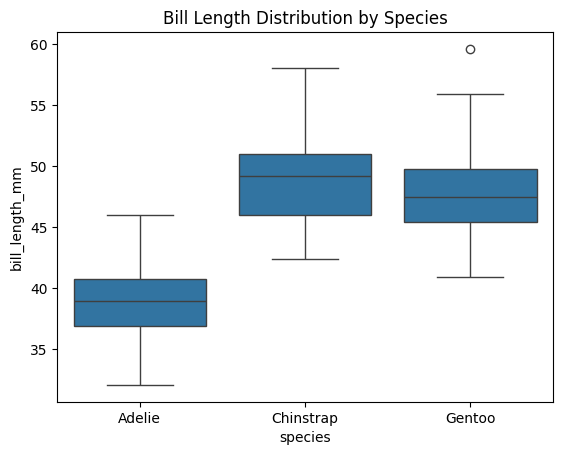

In [49]:
# visualizations
sns.boxplot(x='species',y='bill_length_mm',data=penguins_train)
plt.title("Bill Length Distribution by Species")
plt.show()

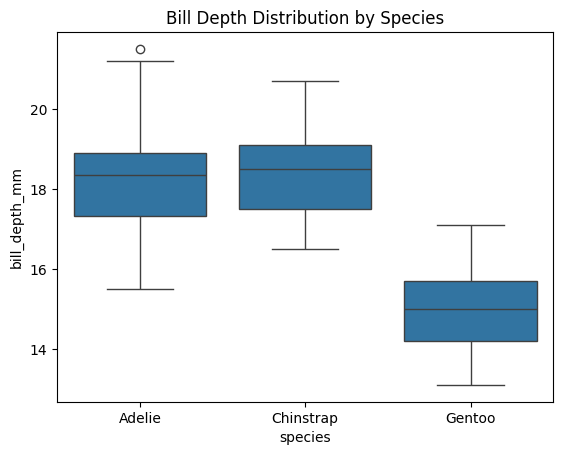

In [50]:
sns.boxplot(x='species',y='bill_depth_mm',data=penguins_train)
plt.title("Bill Depth Distribution by Species")
plt.show()

I wanted to analyze the distribution of bill length and bill depth among penguins, so I used boxplots, which are effective for displaying the distribution of large datasets. Utilizing the penguins_train dataframe, I created these boxplots. The results showed that, on average, the Adelie species has a noticeably shorter bill length. Conversely, the Gentoo species tends to have a smaller bill depth in comparison.

### Models

In [41]:
# process data for ML
X_train = penguins_train[["bill_length_mm", "bill_depth_mm"]]
y_train = penguins_train["species"]

X_test = penguins_test[["bill_length_mm", "bill_depth_mm"]]
y_test = penguins_test["species"]

In [42]:
# train models
dummy_clf=DummyClassifier()
dt_clf=DecisionTreeClassifier()

dummy_clf.fit(X_train, y_train)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
# save models
dump(dummy_clf, "penguins-dummy.joblib")
dump(dt_clf, "penguins-dt.joblib")

['penguins-dt.joblib']

## Results

In [58]:
# report model metrics
print(np.mean(y_test.to_numpy()==dummy_clf.predict(X_test)))
print(np.mean(y_test.to_numpy()==dt_clf.predict(X_test)))
      

0.48
0.94


## Discussion

### Conclusion